C:\Users\srava\AppData\Local\Temp\ipykernel_44544\39382482.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_2020 = pd.read_csv(dataset_2020, delimiter='    ',


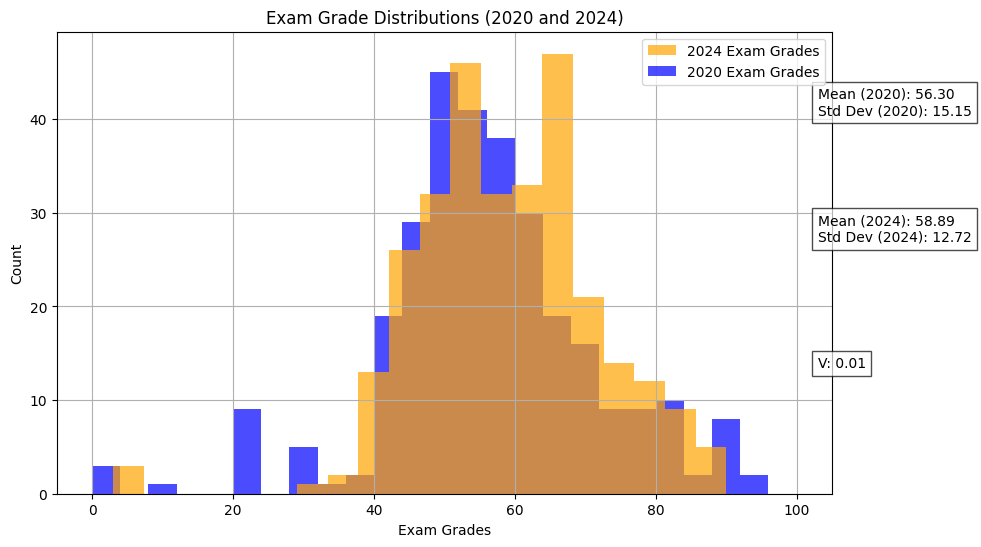

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Student ID number
student_id = 23001152

# Load datasets based on the last digit of the student ID
last_digit = student_id % 10
dataset_2020 = f"2020input{last_digit}.csv"
dataset_2024 = f"2024input{last_digit}.csv"

# Read datasets
data_2020 = pd.read_csv(dataset_2020, delimiter='    ',
                        header=None, names=['Xleft', 'Xright', 'Count'])

# Rename 'Fraction' column to 'Count'
data_2020.rename(columns={'Fraction': 'Count'}, inplace=True)

# Create histograms
plt.figure(figsize=(10, 6))

# Histogram for 2020
plt.bar((data_2020['Xleft'] + data_2020['Xright']) / 2, data_2020['Count'],
        width=data_2020['Xright'] - data_2020['Xleft'], alpha=0.7,
        label='2020 Exam Grades', color='blue')

# Load the 2024 dataset
data_2024 = pd.read_csv(dataset_2024, header=None, names=['Grade'])

# Histogram for 2024
plt.hist(data_2024['Grade'], bins=20, alpha=0.7,
         label='2024 Exam Grades', color='orange')

# Calculate mean values and standard deviations for 2020 distribution
mean_2020 = np.sum((data_2020['Xleft'] + data_2020['Xright']) /
                   2 * data_2020['Count']) / np.sum(data_2020['Count'])
std_2020 = np.sqrt(np.sum(((data_2020['Xleft'] + data_2020['Xright']) /
                   2 - mean_2020) ** 2 * data_2020['Count']) / np.sum(data_2020['Count']))

# Calculate mean and standard deviation for 2024 distribution
mean_2024 = np.mean(data_2024['Grade'])
std_2024 = np.std(data_2024['Grade'])

# Print mean and standard deviation values on the plot
max_count = np.max(data_2020['Count'])
plt.text(np.max(data_2020['Xright']) + 3, max_count * 0.9, f'Mean (2020): {mean_2020:.2f}\nStd Dev (2020): {std_2020:.2f}',
         bbox=dict(facecolor='white', alpha=0.7))
plt.text(np.max(data_2020['Xright']) + 3, max_count * 0.6, f'Mean (2024): {mean_2024:.2f}\nStd Dev (2024): {std_2024:.2f}',
         bbox=dict(facecolor='white', alpha=0.7))

# Calculate 'V' value (proportion of students with grade below 25 in 2024 exam)
v_value = np.sum(data_2024['Grade'] < 25) / len(data_2024['Grade'])

# Print 'V' value on the plot
plt.text(np.max(data_2020['Xright']) + 3, max_count * 0.3,
         f'V: {v_value:.2f}', bbox=dict(facecolor='white', alpha=0.7))

# Set plot labels and title
plt.xlabel('Exam Grades')
plt.ylabel('Count')
plt.title('Exam Grade Distributions (2020 and 2024)')
plt.legend()
plt.grid(True)

# Save the plot as a PNG image
plt.savefig(f'{student_id}.png')

# Display the plot
plt.show()